## <i> <span style='color:red'>NEURAL NETWORK-FOREST FIRE DATA</i></span> 

### PROBLEM STATMENT: Predict the burnt area of forest fires with neural network

### Import libraries

In [1]:
## pip install tensorflow

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

### Reading the csv file

In [3]:
forestfire=pd.read_csv("forestfires.csv")
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### Checking the basic info about the data set

In [4]:
forestfire.shape

(517, 31)

In [5]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### Checking whether any duplicated elements are there and if present dropping them

In [6]:
forestfire[forestfire.duplicated(keep=False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
214,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
302,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
forestfire1= forestfire.drop_duplicates()

In [8]:
forestfire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### Dropping onehot encoded columns

In [9]:
forestfire2=forestfire1.drop(forestfire1.columns[11:30],axis=1)

In [10]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


###  Label encoding

In [11]:
forestfire2["month"]=label.fit_transform(forestfire2["month"])
forestfire2["day"]=label.fit_transform(forestfire2["day"])
forestfire2["size_category"]=label.fit_transform(forestfire2["size_category"])

In [12]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


### Visualization for identifying whether the data is normally distributed or not

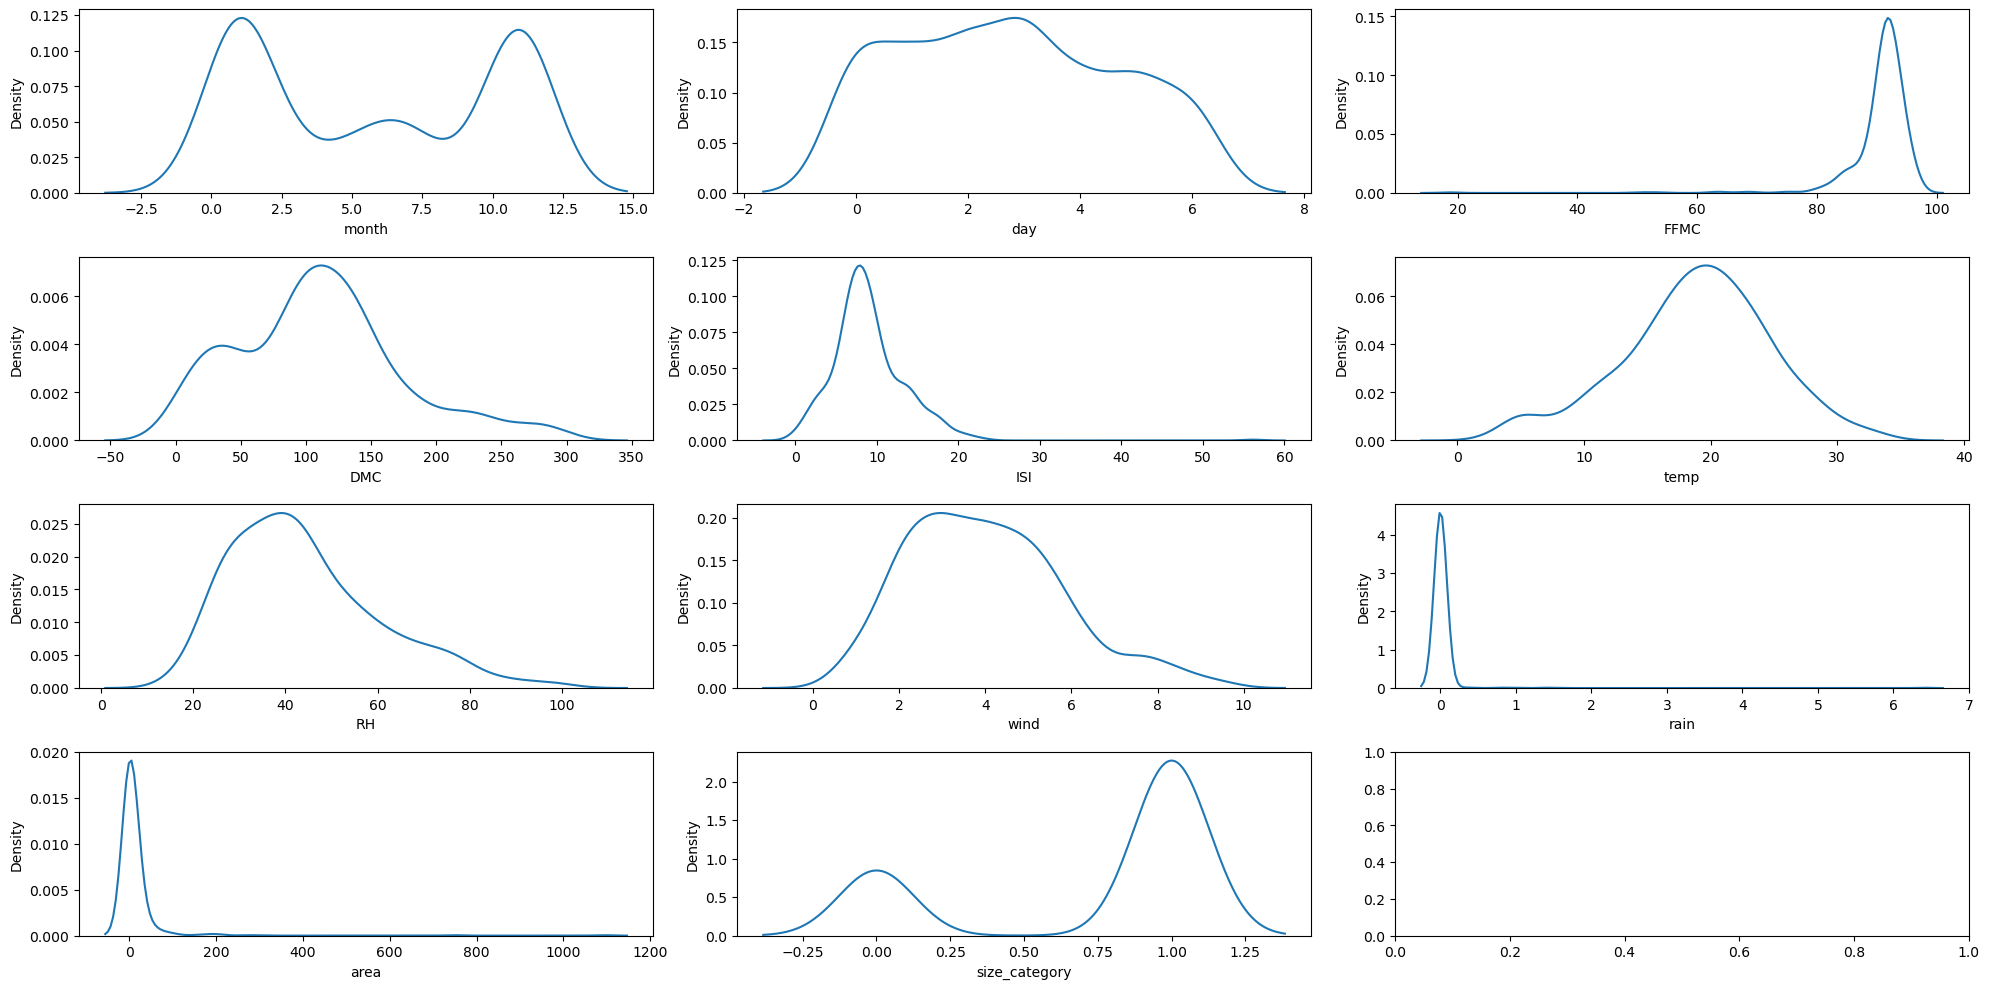

In [13]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.kdeplot(forestfire2.month,ax=ax[0,0])
sns.kdeplot(forestfire2.day,ax=ax[0,1])
sns.kdeplot(forestfire2.FFMC,ax=ax[0,2])
sns.kdeplot(forestfire2.DMC,ax=ax[1,0])
sns.kdeplot(forestfire2.ISI,ax=ax[1,1])
sns.kdeplot(forestfire2.temp,ax=ax[1,2])
sns.kdeplot(forestfire2.RH,ax=ax[2,0])
sns.kdeplot(forestfire2.wind,ax=ax[2,1])
sns.kdeplot(forestfire2.rain,ax=ax[2,2])
sns.kdeplot(forestfire2.area,ax=ax[3,0])
sns.kdeplot(forestfire2.size_category,ax=ax[3,1])

plt.tight_layout()

### Boxplot-To check outliers

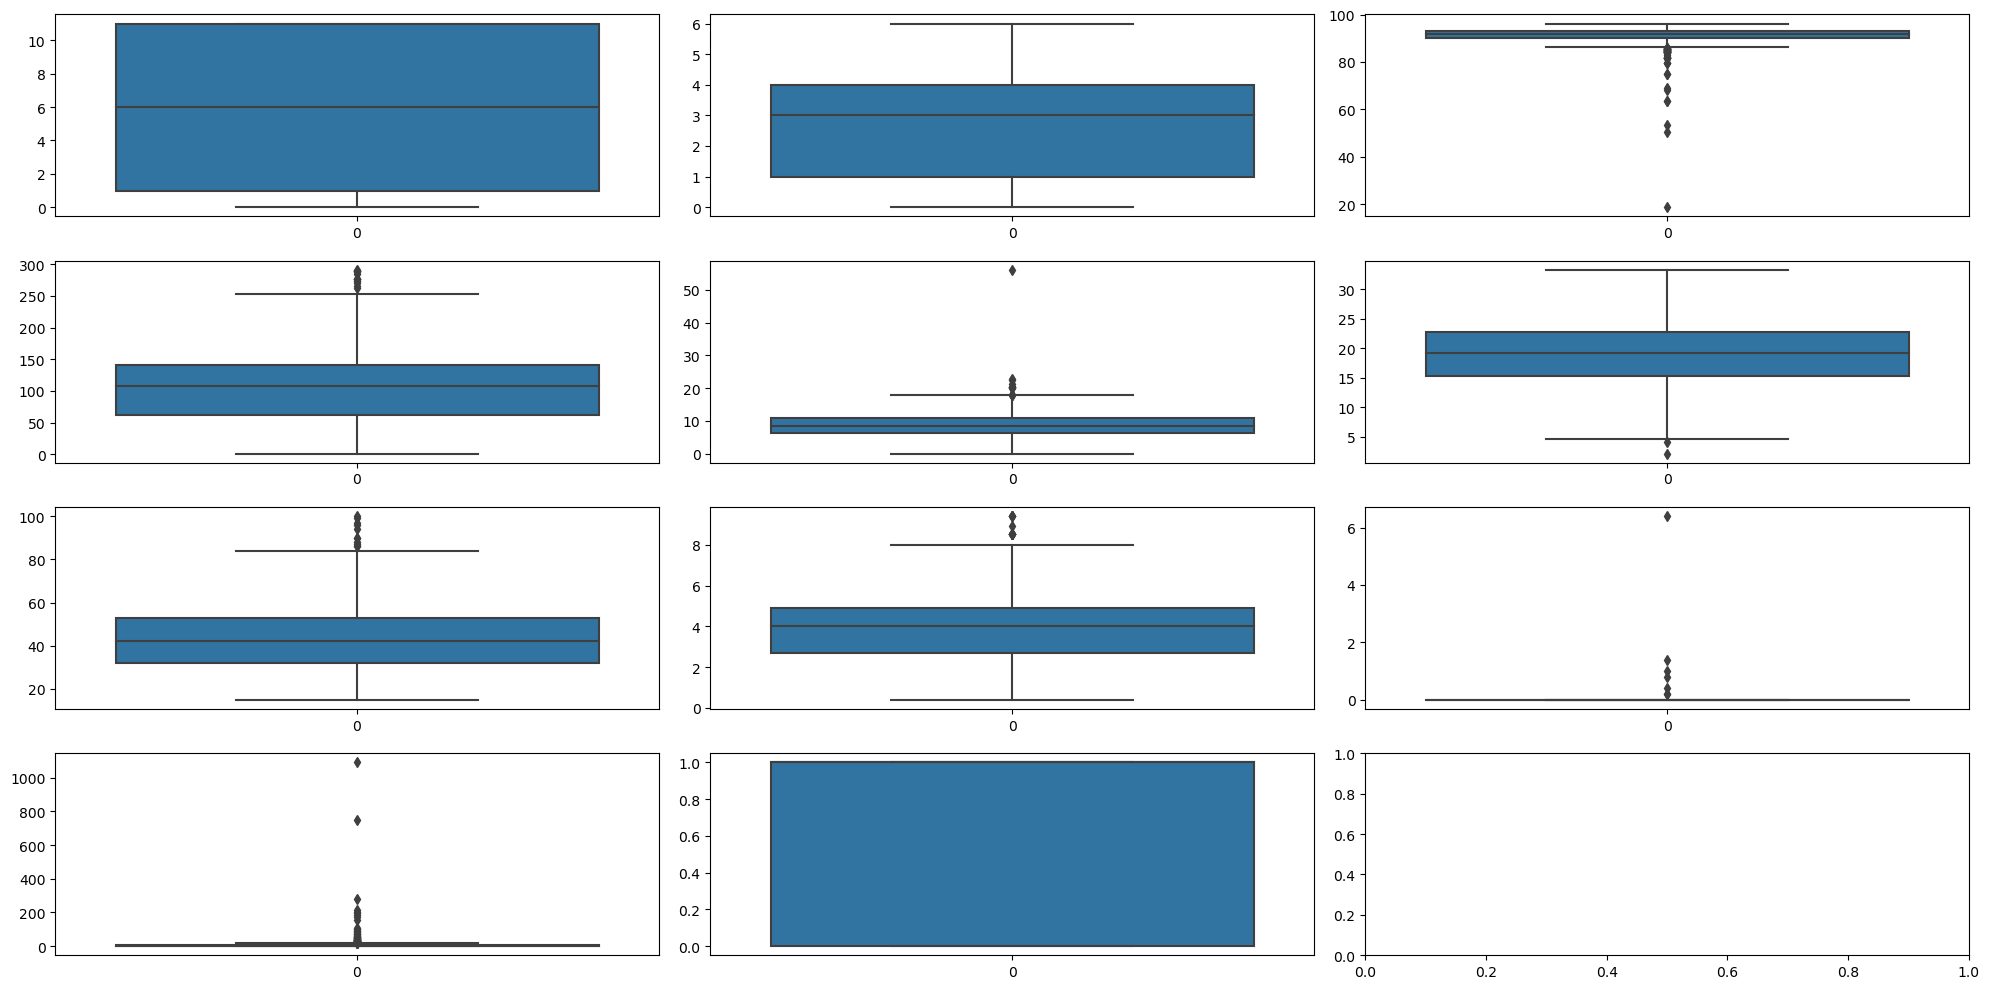

In [14]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.boxplot(forestfire2.month,ax=ax[0,0])
sns.boxplot(forestfire2.day,ax=ax[0,1])
sns.boxplot(forestfire2.FFMC,ax=ax[0,2])
sns.boxplot(forestfire2.DMC,ax=ax[1,0])
sns.boxplot(forestfire2.ISI,ax=ax[1,1])
sns.boxplot(forestfire2.temp,ax=ax[1,2])
sns.boxplot(forestfire2.RH,ax=ax[2,0])
sns.boxplot(forestfire2.wind,ax=ax[2,1])
sns.boxplot(forestfire2.rain,ax=ax[2,2])
sns.boxplot(forestfire2.area,ax=ax[3,0])
sns.boxplot(forestfire2.size_category,ax=ax[3,1])

plt.tight_layout()

###  splitting the independent and target variables

In [15]:
x= forestfire2.iloc[:,:11]
y= forestfire2.iloc[:,-1]

### Constructing a Sequential neural network with
### input neurons:11neurons  
###  hidden layer :8 neurons 
### output layer:1neuron

In [16]:
model1 = Sequential()
model1.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model1.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model1.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

###  Compiling Model with 
### loss function: binary crossentropy
### optimizer:Adam

In [17]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Fitting 

In [18]:
model1.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 8ms/step - loss: 0.5908 - accuracy: 0.7126 - val_loss: 0.6626 - val_accuracy: 0.6726
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7595 - val_loss: 0.6247 - val_accuracy: 0.6845
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.7595 - val_loss: 0.6009 - val_accuracy: 0.6905
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7654 - val_loss: 0.5984 - val_accuracy: 0.6964
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.7801 - val_loss: 0.5295 - val_accuracy: 0.7262
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.8035 - val_loss: 0.4980 - val_accuracy: 0.7917
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8065 - val_loss: 0.4577 - val_accuracy: 0.7917
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9941 - val_loss: 0.1088 - val_accuracy: 0.9643
Epoch 60/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9702
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0696 - val_accuracy: 0.9702
Epoch 62/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.0707 - val_accuracy: 0.9762
Epoch 63/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9702
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9971 - val_loss: 0.0752 - val_accuracy: 0.9702
Epoch 65/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9702
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9765 - val_loss: 0.1721 - val_accuracy: 0.9524
Epoch 117/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9853 - val_loss: 0.1391 - val_accuracy: 0.9405
Epoch 118/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9824 - val_loss: 0.1072 - val_accuracy: 0.9762
Epoch 119/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9941 - val_loss: 0.2173 - val_accuracy: 0.9464
Epoch 120/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0986 - val_accuracy: 0.9762
Epoch 121/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9643
Epoch 122/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9286
Epoch 123/150

###  Model Evaluation

In [19]:
score = model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9862
accuracy: 98.62%


In [20]:
history = model1.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1272 - val_accuracy: 0.9583
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9583
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1288 - val_accuracy: 0.9643
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1246 - val_accuracy: 0.9643
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1443 - val_accuracy: 0.9583
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1290 - val_accuracy: 0.9643
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9941 - val_loss: 0.1776 - val_accuracy: 0.9464
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 0.9643
Epoch 60/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy: 0.9583
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1129 - val_accuracy: 0.9643
Epoch 62/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1127 - val_accuracy: 0.9583
Epoch 63/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1222 - val_accuracy: 0.9583
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1169 - val_accuracy: 0.9643
Epoch 65/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9583
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1083 - val_accuracy: 0.9643
Epoch 117/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1096 - val_accuracy: 0.9643
Epoch 118/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 0.9643
Epoch 119/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1057 - val_accuracy: 0.9643
Epoch 120/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1134 - val_accuracy: 0.9643
Epoch 121/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9643
Epoch 122/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9971 - val_loss: 0.1054 - val_accuracy: 0.9702
Epoch 123/150

### List all the evaulation metric in built model (history)

In [21]:
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualization with model accuracy for train and test data

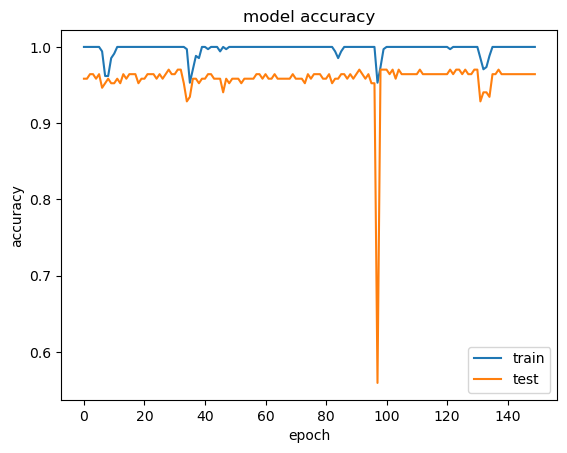

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Visualising the model history for the train and test loss

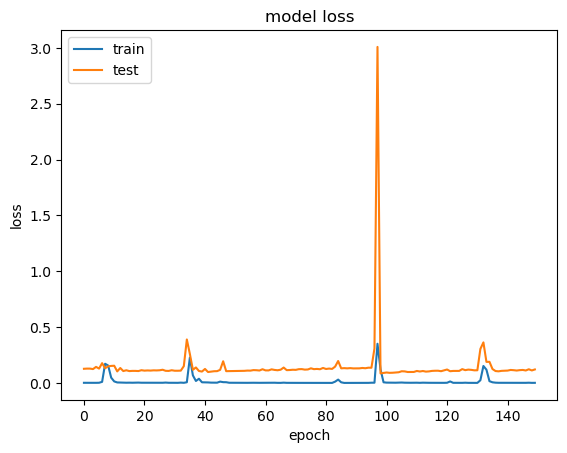

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Inference:

###  For classifying the burnt areas in forest by using neural network giving highest evaluation accuracy 95.83% and with a minimal loss of 0.1778% 